**How to Decompose Time Series Data into Trend and Seasonality**
---

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

In this tutorial, you will discover time series decomposition and how to automatically split a time series into its components with Python.

After completing this tutorial, you will know:

The time series decomposition method of analysis and how it can help with forecasting.\
How to automatically decompose time series data in Python.\
How to decompose additive and multiplicative time series problems and plot the results.

#### **Time Series Components**

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

`Systematic:` Components of the time series that have consistency or recurrence and can be described and modeled.
`Non-Systematic:` Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:\

`Level:` The average value in the series.\
`Trend:` The increasing or decreasing value in the series.\
`Seasonality:` The repeating short-term cycle in the series.\
`Noise:` The random variation in the series.

#### **Combining Time Series Components**

**`Additive Model`**
An additive model suggests that the components are added together as follows:
`y(t) = Level + Trend + Seasonality + Noise`

**`Multiplicative Model`**
A multiplicative model suggests that the components are multiplied together as follows:

`y(t) = Level * Trend * Seasonality * Noise`



#### **Decomposition as a Tool**

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

#### **Automatic Time Series Decomposition**
There are methods to automatically decompose a time series.

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called `seasonal_decompose().` It requires that you specify whether the model is additive or multiplicative.

The `seasonal_decompose()` function returns a result object. The result object contains arrays to access four pieces of data from the decomposition

##### **Additive Decomposition**
We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the period=1 argument). If a Pandas Series object is provided, this argument is not required.

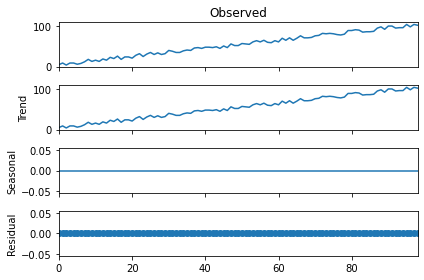

In [1]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

##### **Multiplicative Decomposition**

We can contrive a quadratic time series as a square of the time step from 1 to 99, and then decompose it assuming a multiplicative model.

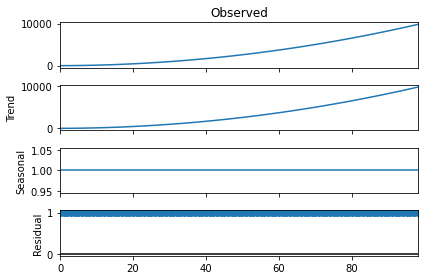

In [2]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

#### **Airline Passengers Dataset**

In [4]:
import pandas as pd

In [5]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header = 0, index_col = 0)

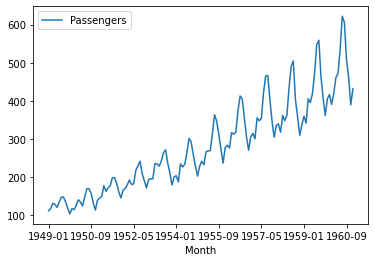

In [6]:
series.plot()
pyplot.show()

Reviewing the line plot,\
- it suggests that there may be a linear trend, but it is hard to be sure from eye-balling. 
- There is also seasonality, but the amplitude (height) of the cycles appears to be increasing, suggesting that it is multiplicative.

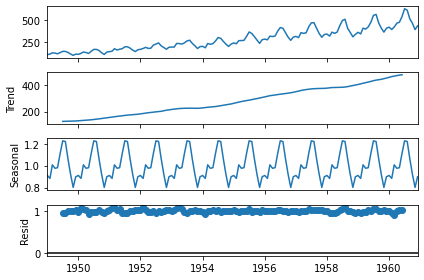

In [11]:
# Decompose using multiplicative model
# specify 

series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header = 0, index_col = 0)

# set month as index
series.index = pd.to_datetime(series.index, format = '%Y-%m')
series.head()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

Running the example plots the observed, trend, seasonal, and residual time series.

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability in the early and later years of the series.